**THE NAME:**

**ASRAR Q ALRSHEEDI**
**ID:431007275** 

***Import the lib***

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=227c9b8fddcd9d020cee5cb4e1a2d94ffe93d27ca9dafe097485feee9d69ee16
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


***Data Collection and Analysis***

In [ ]:
## loading dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# bbox_train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/bbox_train.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '/content/bbox_train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


In [ ]:
df1.head(5)

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202


In [ ]:
#Print number Columns and Rows in the dataset
df1.shape

(1000, 7)

In [ ]:
##Getteing the statistical measures of the data
df1.describe()

,width,height,xmin,ymin,xmax,ymax
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,607.874000,418.764000,269.102000,125.951000,336.019000,196.676000
std,26.105241,44.587266,118.397963,56.853944,119.070325,64.052617
min,408.000000,272.000000,0.000000,0.000000,24.000000,31.000000
25%,612.000000,408.000000,189.000000,86.000000,254.750000,153.000000
50%,612.000000,408.000000,272.000000,120.000000,340.500000,195.000000
75%,612.000000,408.000000,351.500000,164.000000,417.000000,237.000000
max,612.000000,612.000000,588.000000,360.000000,612.000000,455.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1000 non-null   object
 1   width   1000 non-null   int64 
 2   height  1000 non-null   int64 
 3   xmin    1000 non-null   int64 
 4   ymin    1000 non-null   int64 
 5   xmax    1000 non-null   int64 
 6   ymax    1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [ ]:
df1['Name'].value_counts()

10184.jpg    21
10320.jpg    15
10290.jpg    14
10257.jpg    13
10054.jpg    11
             ..
10088.jpg     2
10087.jpg     2
10069.jpg     2
10067.jpg     1
10097.jpg     1
Name: Name, Length: 238, dtype: int64

In [ ]:
df1.groupby('Name').mean()

,width,height,xmin,ymin,xmax,ymax
Name,,,,,,
10001.jpg,612.0,408.0,278.750000,181.500000,318.500000,220.500000
10002.jpg,612.0,408.0,367.250000,182.500000,402.750000,217.500000
10003.jpg,612.0,383.0,128.500000,8.500000,323.500000,196.500000
10004.jpg,612.0,407.0,259.000000,175.666667,370.000000,283.666667
10006.jpg,612.0,408.0,253.750000,171.500000,290.750000,208.000000
...,...,...,...,...,...,...
10351.jpg,612.0,408.0,338.000000,93.000000,384.333333,139.333333
10353.jpg,612.0,408.0,271.750000,184.250000,361.250000,275.000000
10354.jpg,612.0,408.0,285.833333,127.500000,326.166667,168.500000


In [ ]:
# check for null values
df1.isnull().sum()

Name      0
width     0
height    0
xmin      0
ymin      0
xmax      0
ymax      0
dtype: int64

In [ ]:
## Seprating data & labels 
X=df1.drop(columns='Name',axis=1)
Y=df1['Name']

In [ ]:
print(X)
print(Y)

     width  height  xmin  ymin  xmax  ymax
0      612     408   192   199   230   235
1      612     408   247   168   291   211
2      612     408   321   176   366   222
3      612     408   355   183   387   214
4      612     408   339   165   378   202
..     ...     ...   ...   ...   ...   ...
995    612     408   374   212   439   273
996    612     408   283    41   362   123
997    612     408   220    95   296   170
998    612     408   291   188   366   264
999    612     408   137   160   232   256

[1000 rows x 6 columns]
0      10001.jpg
1      10001.jpg
2      10001.jpg
3      10001.jpg
4      10002.jpg
         ...    
995    10355.jpg
996    10357.jpg
997    10357.jpg
998    10357.jpg
999    10357.jpg
Name: Name, Length: 1000, dtype: object


***Data Standarization***

In [ ]:
scaler= StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standrized_data=scaler.transform(X)

In [ ]:
print(standrized_data)

[[ 0.15813164 -0.24153501 -0.65153638  1.2854966  -0.8908353   0.59861998]
 [ 0.15813164 -0.24153501 -0.18676892  0.73996696 -0.37827667  0.22374054]
 [ 0.15813164 -0.24153501  0.43855458  0.8807488   0.25191837  0.39556029]
 ...
 [ 0.15813164 -0.24153501 -0.41492749 -0.54466735 -0.33626367 -0.41667849]
 [ 0.15813164 -0.24153501  0.18504505  1.09192157  0.25191837  1.0515993 ]
 [ 0.15813164 -0.24153501 -1.11630384  0.59918512 -0.8740301   0.92663949]]


In [ ]:
x= standrized_data
y=df1['Name']

In [ ]:
print(x)
print(y)

[[ 0.15813164 -0.24153501 -0.65153638  1.2854966  -0.8908353   0.59861998]
 [ 0.15813164 -0.24153501 -0.18676892  0.73996696 -0.37827667  0.22374054]
 [ 0.15813164 -0.24153501  0.43855458  0.8807488   0.25191837  0.39556029]
 ...
 [ 0.15813164 -0.24153501 -0.41492749 -0.54466735 -0.33626367 -0.41667849]
 [ 0.15813164 -0.24153501  0.18504505  1.09192157  0.25191837  1.0515993 ]
 [ 0.15813164 -0.24153501 -1.11630384  0.59918512 -0.8740301   0.92663949]]
0      10001.jpg
1      10001.jpg
2      10001.jpg
3      10001.jpg
4      10002.jpg
         ...    
995    10355.jpg
996    10357.jpg
997    10357.jpg
998    10357.jpg
999    10357.jpg
Name: Name, Length: 1000, dtype: object


***Train & Test Split***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=2) 
print(x.shape,X_train.shape, X_test.shape)

(1000, 6) (750, 6) (250, 6)


**Training the model**

In [ ]:
classifier= svm.SVC(kernel='linear')

***Training the SVM***

In [ ]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

***Model Evaluation***

In [ ]:
## Accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [ ]:
print('Accuracy Score of the Training data: ',training_data_accuracy )

Accuracy Score of the Training data:  0.74


In [ ]:
## Accuracy score on the training data
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,y_test)

In [ ]:
print('Accuracy Score of the Testing data: ',testing_data_accuracy )

Accuracy Score of the Testing data:  0.152


***PLOT***

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

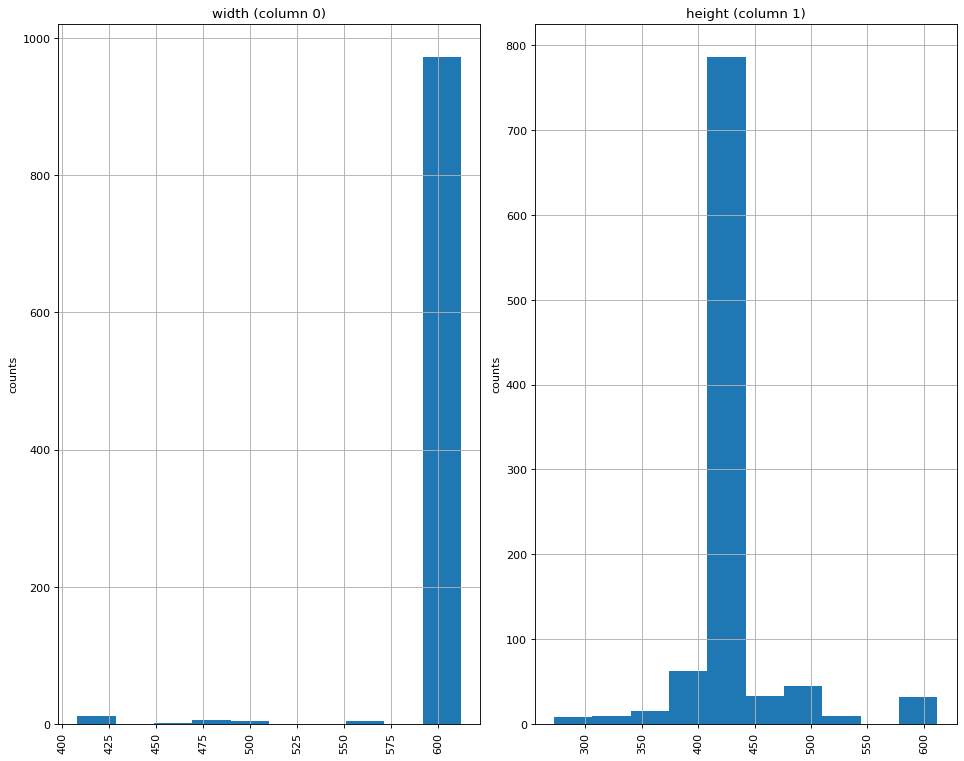

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

<ipython-input-33-a7374163eadb>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


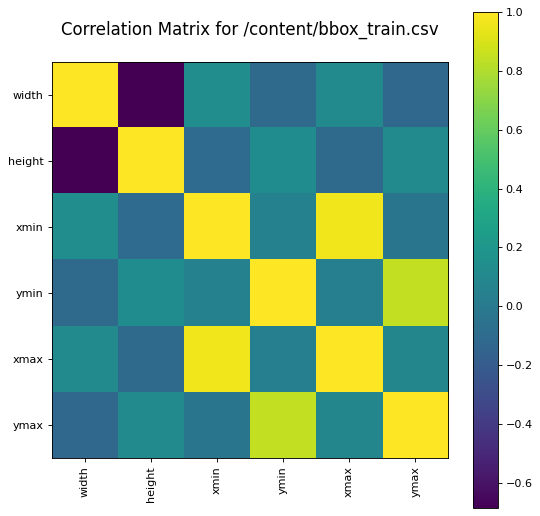

In [ ]:
plotCorrelationMatrix(df1, 8)

<ipython-input-33-a7374163eadb>:22: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


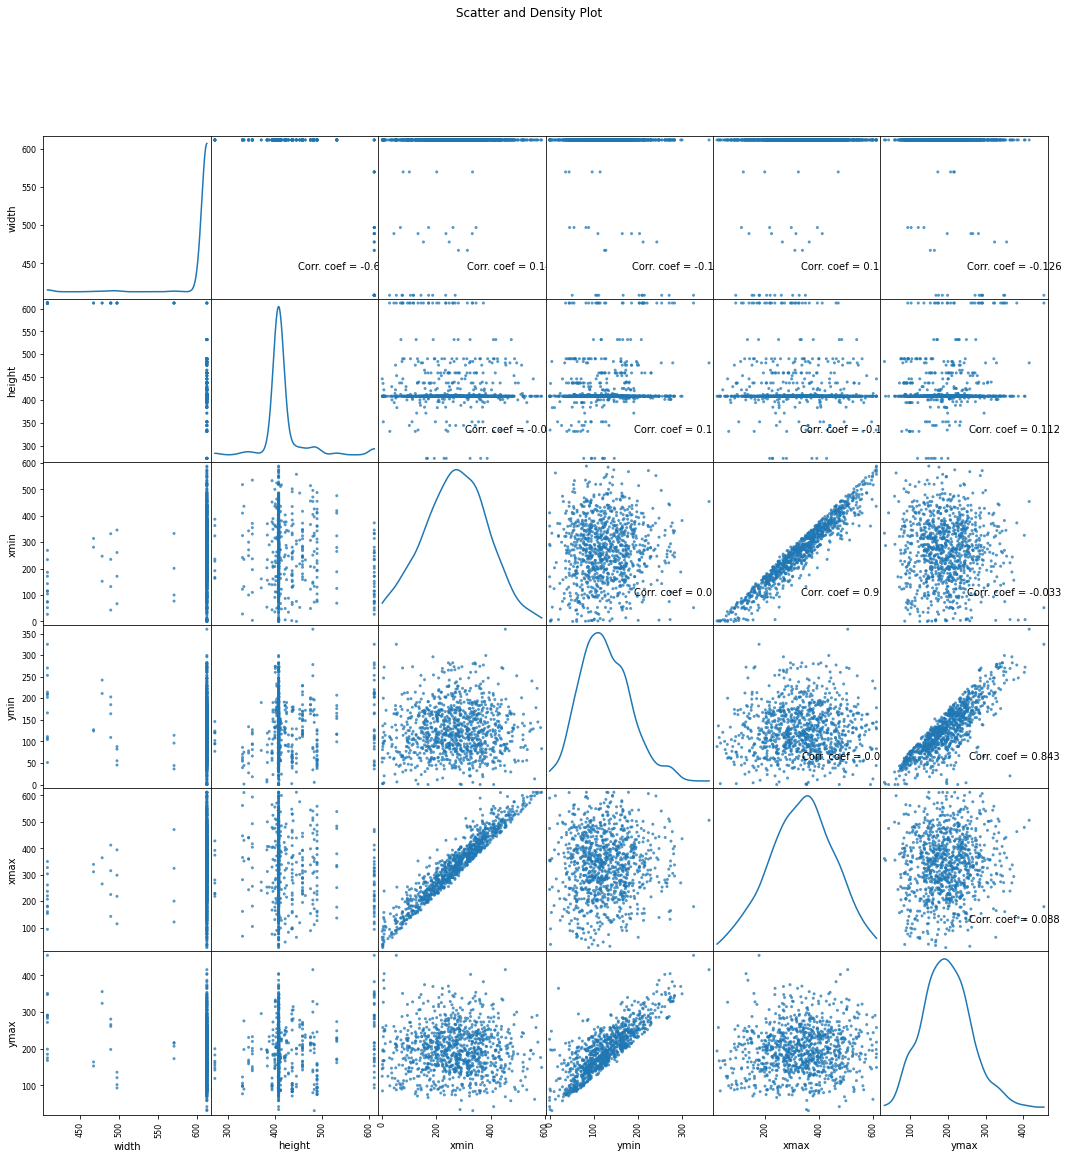

In [ ]:
plotScatterMatrix(df1, 18, 10)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/train.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = '/content/train.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 2 columns


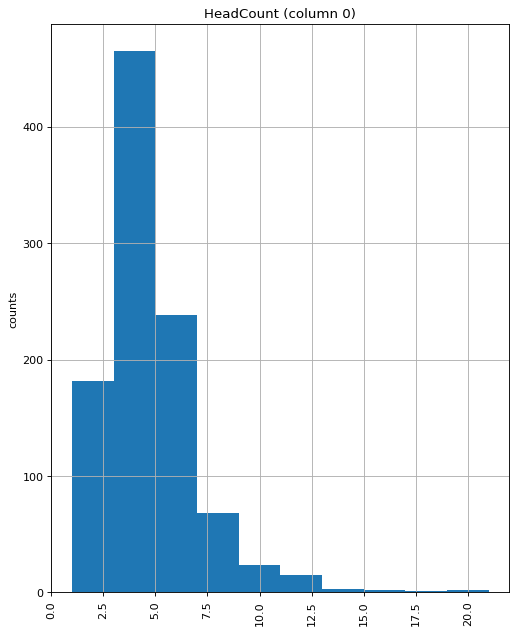

In [ ]:
plotPerColumnDistribution(df2, 10, 5)